In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

solar = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\\클러스터링\\구역2\\구역2_태양광.csv',
                     encoding='utf-8')
charger = pd.read_csv('C:\\신현호\\2021_2학기_공모전\\코드구성\클러스터링\\구역2\\구역2_충전소.csv',
                     encoding='utf-8')
solar

,주소,y,x
0,서울시 금천구 두산로,37.470374,126.892158
1,서울시 금천구 가산로,37.473702,126.895121
2,서울시 금천구 시흥대로,37.457343,126.899406
3,서울시 금천구 탑골로,37.452077,126.913756
4,서울시 금천구 문성로,37.476594,126.907881
...,...,...,...
106,서울 양천구 월정로 161-5,37.533014,126.836025
107,서울시 양천구 신월4동 436-6,37.522121,126.838070
108,서울시 양천구 신월7동 331-104,37.522652,126.828194
109,서울시 양천구 신정4동 882-11,37.528291,126.859954


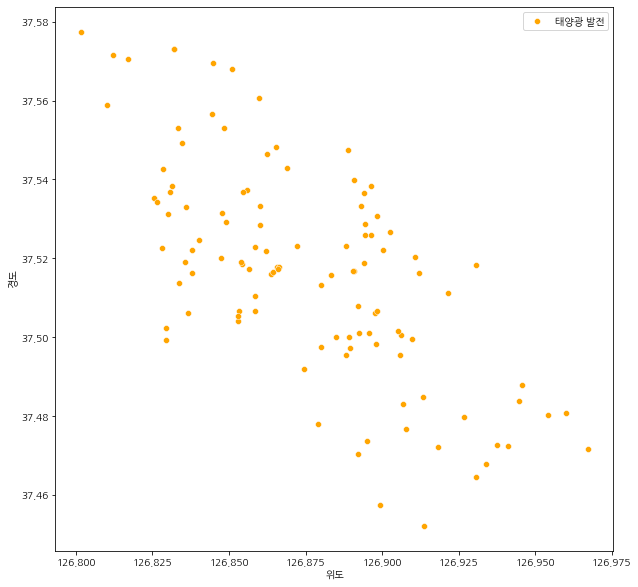

In [2]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
#sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

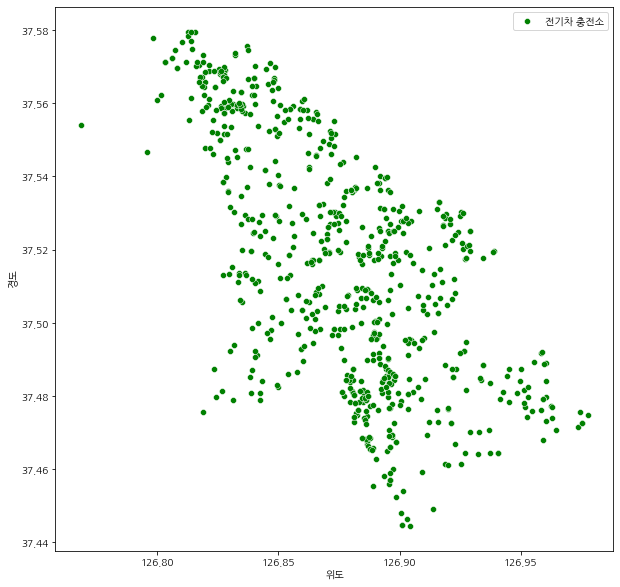

In [3]:
fig = plt.figure(figsize=(10,10))
#sns.scatterplot(data=solar, x='x',y='y',color='orange',label='태양광 발전')
sns.scatterplot(data=charger, x='x',y='y',color='green',label='전기차 충전소')
plt.xlabel('위도')
plt.ylabel('경도')
#plt.yticks(rotation='45')
plt.legend()

In [25]:
import scipy as sp
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

charger_clu = charger[['y','x']]
model_ch = KMeans(n_clusters = 2, algorithm = 'auto')
model_ch.fit(charger_clu)
predict=pd.DataFrame(model_ch.predict(charger_clu))
predict.columns=['predict']

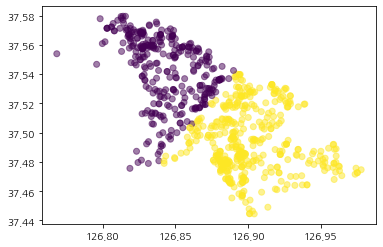

In [26]:
r = pd.concat([charger_clu,predict],axis=1)

plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)

In [27]:
solar_clu = solar[['y','x']]
model_so = KMeans(n_clusters = 2, algorithm = 'auto')
model_so.fit(solar_clu)
predict_solar=pd.DataFrame(model_so.predict(solar_clu))
predict_solar.columns=['predict']

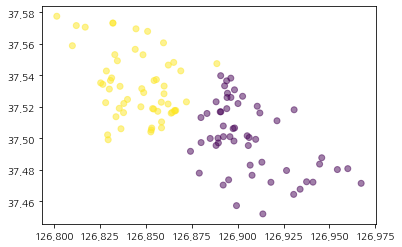

In [28]:
r_solar = pd.concat([solar_clu,predict_solar],axis=1)

plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)

# Elbow 기법

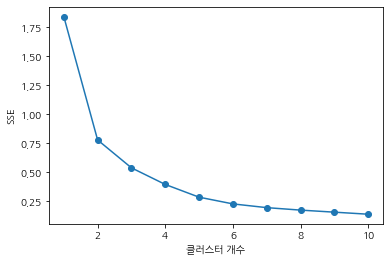

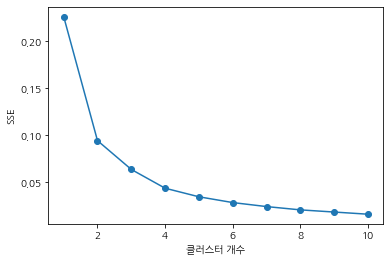

In [22]:
from sklearn.cluster import KMeans

def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++',random_state = 0)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('SSE')
    plt.show()
    
elbow(charger_clu)
elbow(solar_clu)

# Silouette 기법

In [24]:
from sklearn.metrics import silhouette_score

k_range = range(2,30)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(charger_clu)
    clusters = kmeans.predict(charger_clu)
    
    score = silhouette_score(charger_clu, clusters)
    print('k: ',k,'score: ',score)
    
    if score>best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n: ',best_n, 'best score: ',best_silhouette_score)

k:  2 score:  0.4796058906606899
k:  3 score:  0.4004576750947338
k:  4 score:  0.418291619482502
k:  5 score:  0.45938208103132594
k:  6 score:  0.4495024054871652
k:  7 score:  0.43861350227445567
k:  8 score:  0.3974485799927863
k:  9 score:  0.39427817835106976
k:  10 score:  0.4089171291741776
k:  11 score:  0.4184848221426569
k:  12 score:  0.3903506718873973
k:  13 score:  0.403586353014308
k:  14 score:  0.39719370704694934
k:  15 score:  0.4021491981414038
k:  16 score:  0.41788677294170795
k:  17 score:  0.4110723767940162
k:  18 score:  0.4082884925901153
k:  19 score:  0.41450876888372634
k:  20 score:  0.40109965731621305
k:  21 score:  0.41774080142982134
k:  22 score:  0.4089893454393632
k:  23 score:  0.41090075557735645
k:  24 score:  0.41532805491823016
k:  25 score:  0.4144734164086819
k:  26 score:  0.39887746106044325
k:  27 score:  0.39355356509578704
k:  28 score:  0.39597585335848756
k:  29 score:  0.40355826050697435
best n:  2 best score:  0.4796058906606899


(array([126.84, 126.85, 126.86, 126.87, 126.88, 126.89, 126.9 , 126.91]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

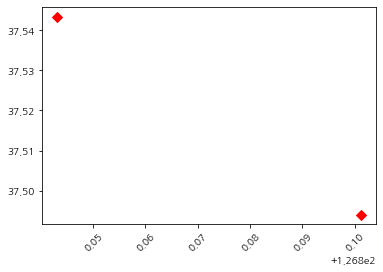

In [29]:
#충전소 centroid
centers_charger = pd.DataFrame(model_ch.cluster_centers_,columns=['y','x'])
center_x = centers_charger['x']
center_y = centers_charger['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xticks(rotation='45')

(array([126.84, 126.85, 126.86, 126.87, 126.88, 126.89, 126.9 , 126.91]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

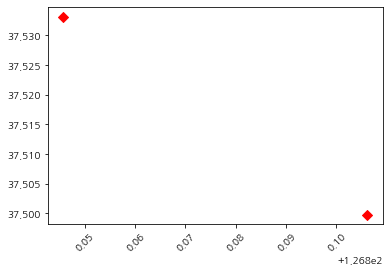

In [30]:
#태양광
centers_solar = pd.DataFrame(model_so.cluster_centers_,columns=['y','x'])
center_x_solar = centers_solar['x']
center_y_solar = centers_solar['y']
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.xticks(rotation='45')

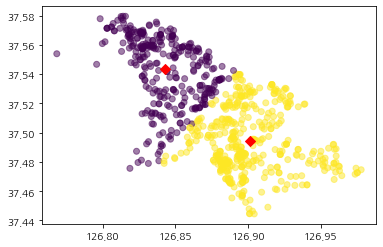

In [31]:
#충전소
plt.scatter(r['x'],r['y'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')

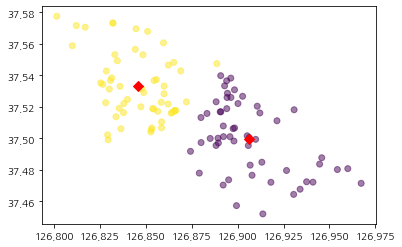

In [32]:
#태양광
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')

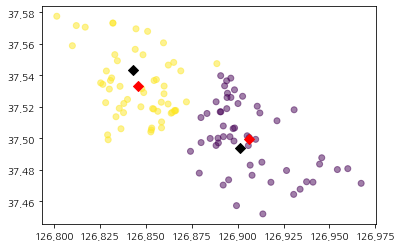

In [33]:
plt.scatter(r_solar['x'],r_solar['y'],c=r_solar['predict'],alpha=0.5)
plt.scatter(center_x_solar,center_y_solar,s=50,marker='D',c='r')
plt.scatter(center_x,center_y,s=50,marker='D',c='black')

In [34]:
print(center_x, center_y)
print(center_x_solar, center_y_solar)

0    126.843079
1    126.901222
Name: x, dtype: float64 0    37.543267
1    37.494031
Name: y, dtype: float64
0    126.906156
1    126.845701
Name: x, dtype: float64 0    37.499762
1    37.533105
Name: y, dtype: float64


중점:37.51754123857217, 126.874039555134


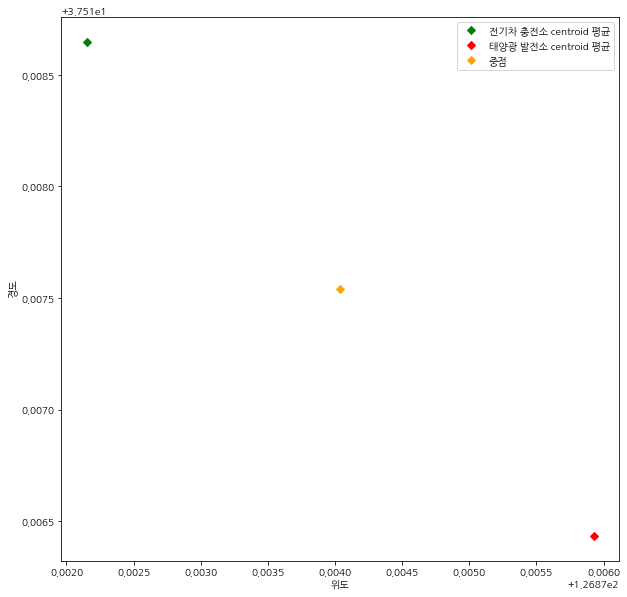

In [35]:
center_x_list = center_x.tolist()
center_y_list = center_y.tolist()

center_x_solar_list = center_x_solar.tolist()
center_y_solar_list = center_y_solar.tolist()


center_x_list = np.array(center_x)
center_y_list = np.array(center_y)

center_x_solar_list = np.array(center_x_solar)
center_y_solar_list = np.array(center_y_solar)

c_x = center_x_list.mean()
c_y = center_y_list.mean()

c_x_s = center_x_solar_list.mean()
c_y_s = center_y_solar_list.mean()

mean_x = (c_x+c_x_s)/2
mean_y = (c_y+c_y_s)/2

print('중점:{0}, {1}'.format(mean_y,mean_x))

fig = plt.figure(figsize=(10,10))
plt.plot(c_x,c_y,'D',color='green',label='전기차 충전소 centroid 평균')
plt.plot(c_x_s, c_y_s, 'D',color= 'red',label='태양광 발전소 centroid 평균')
plt.plot(mean_x, mean_y,'D', color='orange',label='중점')
plt.xlabel('위도')
plt.ylabel('경도')
plt.legend()
plt.show()
#구로구

In [36]:
#강서구 37.5510 126.8495
#양천구 37.5169 126.8664
#구로구 37.4954 126.8874
#금천구 37.4519 126.9020
#영등포구 37.5264 126.8962
#관악구 37.4784 126.9516

gs_y = 37.5510
gs_x = 126.8495
gs = []
gs.append(gs_y)
gs.append(gs_x)

yc_y = 37.5169 
yc_x = 126.8664
yc = []
yc.append(yc_y)
yc.append(yc_x)

gr_y = 37.4954 
gr_x = 126.8874
gr = []
gr.append(gr_y)
gr.append(gr_x)

gc_y = 37.4519
gc_x = 126.9020
gc = []
gc.append(gc_y)
gc.append(gc_x)

ydp_y = 37.5264
ydp_x = 126.8962
ydp = []
ydp.append(ydp_y)
ydp.append(ydp_x)

gw_y = 37.4784
gw_x = 126.9516
gw = []
gw.append(gw_y)
gw.append(gw_x)

area = []
area.append(gs)
area.append(yc)
area.append(gr)
area.append(gc)
area.append(ydp)
area.append(gw)

area

[[37.551, 126.8495],
 [37.5169, 126.8664],
 [37.4954, 126.8874],
 [37.4519, 126.902],
 [37.5264, 126.8962],
 [37.4784, 126.9516]]

In [37]:
import math

line = []

for i in range(len(area)):
    dist = math.sqrt((c_y_s-area[i][0])**2+(c_x_s-area[i][1])**2)
    line.append(dist)
line

[0.043512205913929555,
 0.009540105850504441,
 0.023958362121025836,
 0.0696009940621841,
 0.022588820033276148,
 0.08469179814830675]

In [38]:
print("태양광 최적입지 좌표:{}, {}".format(c_y_s, c_x_s))
print("강서구에서의 거리: {}".format(line[0]))
print("양천구에서의 거리: {}".format(line[1]))
print("구로구에서의 거리: {}".format(line[2]))
print("금천구에서의 거리: {}".format(line[3]))
print("영등포구에서의 거리: {}".format(line[4]))
print("관악구에서의 거리: {}".format(line[5]))

태양광 최적입지 좌표:37.51643360056494, 126.87592869829545
강서구에서의 거리: 0.043512205913929555
양천구에서의 거리: 0.009540105850504441
구로구에서의 거리: 0.023958362121025836
금천구에서의 거리: 0.0696009940621841
영등포구에서의 거리: 0.022588820033276148
관악구에서의 거리: 0.08469179814830675
